In [0]:
%tensorflow_version 2.x
import tensorflow as tf # xd
import numpy as np # data manipulation
import pandas as pd # data manipulation
import matplotlib.pyplot as plt # data visualisation

from sklearn.datasets import load_linnerud # dataset
from sklearn.model_selection import train_test_split # split to data 
from sklearn.preprocessing import StandardScaler # scale the data

TensorFlow 2.x selected.


In [0]:
dataset = load_linnerud()

In [0]:
print(dataset.DESCR)

.. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset constains two small dataset:

- *physiological* - CSV containing 20 observations on 3 exercise variables:
   Weight, Waist and Pulse.

- *exercise* - CSV containing 20 observations on 3 physiological variables:
   Chins, Situps and Jumps.

.. topic:: References

  * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris: Editions Technic.



In [0]:
dataset.target_names

['Weight', 'Waist', 'Pulse']

In [0]:
dataset.feature_names

['Chins', 'Situps', 'Jumps']

In [0]:
# Let's create a dataframe to see what we have
feature_data = dataset.data
target_data = dataset.target
columns = np.concatenate((dataset.feature_names, dataset.target_names), axis = 0)
all_data = np.concatenate((feature_data, target_data), axis = 1)

In [0]:
pd.DataFrame(all_data, columns = columns)

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0
5,4.0,101.0,42.0,182.0,36.0,56.0
6,8.0,101.0,38.0,211.0,38.0,56.0
7,6.0,125.0,40.0,167.0,34.0,60.0
8,15.0,200.0,40.0,176.0,31.0,74.0
9,17.0,251.0,250.0,154.0,33.0,56.0


In [0]:
X = dataset.data
Y = dataset.target

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .2)
N, D = X_train.shape
Nt, Dt = X_test.shape

In [0]:
# Normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Train on 16 samples, validate on 4 samples
Epoch 1/300
16/16 - 0s - loss: 12253.3105 - val_loss: 12356.9287
Epoch 2/300
16/16 - 0s - loss: 12092.4414 - val_loss: 12082.7080
Epoch 3/300
16/16 - 0s - loss: 11822.5107 - val_loss: 11736.2783
Epoch 4/300
16/16 - 0s - loss: 11481.5605 - val_loss: 11345.4160
Epoch 5/300
16/16 - 0s - loss: 11096.9629 - val_loss: 10929.7998
Epoch 6/300
16/16 - 0s - loss: 10688.1055 - val_loss: 10503.1680
Epoch 7/300
16/16 - 0s - loss: 10268.5264 - val_loss: 10074.9854
Epoch 8/300
16/16 - 0s - loss: 9847.5410 - val_loss: 9651.6572
Epoch 9/300
16/16 - 0s - loss: 9431.4531 - val_loss: 9237.4238
Epoch 10/300
16/16 - 0s - loss: 9024.4336 - val_loss: 8835.0068
Epoch 11/300
16/16 - 0s - loss: 8629.1553 - val_loss: 8446.0674
Epoch 12/300
16/16 - 0s - loss: 8247.2432 - val_loss: 8071.5273
Epoch 13/300
16/16 - 0s - loss: 7879.5981 - val_loss: 7711.8008
Epoch 14/300
16/16 - 0s - loss: 7526.6226 - val_loss: 7366.9600
Epoch 15/300
16/16 - 0s - loss: 7188.3799 - val_loss: 70

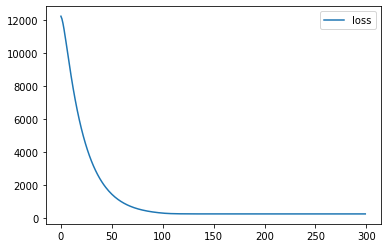

In [0]:
# Create the model

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(3, input_shape = (D,))) # We have 3 output variable

# compile the model
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01, momentum = .7),
              loss = 'mse' 
              )

# learning rate scheduler: reduces the learning rate of the optimizer when the model passed the specified number of epochs
def schedule(epoch, lr):
  if epoch >= 100:
    return lr - (lr*.1)
  return lr

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

# fit to the data
r = model.fit(X_train, y_train, validation_data = (X_test, y_test),verbose = 2, callbacks = [scheduler], epochs = 300)

# results
print('Evaluated Test Score:', model.evaluate(X_test, y_test))
print('Evaluated Train Score:', model.evaluate(X_train, y_train))


# plot the loss
plt.plot(r.history['loss'], label = 'loss')
plt.legend()
plt.show()

In [0]:
# Predict the test data
P = model.predict(X_test)
e = abs(P - y_test) # absolute error between the predictions and true data

In [0]:
print(dataset.feature_names)
print(dataset.target_names)

['Chins', 'Situps', 'Jumps']
['Weight', 'Waist', 'Pulse']


In [0]:
# To have a better view on data, let's concatenate everything together and take a look to some statistical information about what we done
cols = ['scaled_Chins','scaled_Situps','scaled_Jumps','Weight','Waist','Pulse', 'pred_Weight','pred_Waist','pred_Pulse','error_Weight','error_Waist','error_Pulse']
final_data = pd.DataFrame(np.concatenate((X_test, y_test, P, e), axis = 1), columns = cols)
final_data
# We can see that the predictions are pretty accurate :D

,scaled_Chins,scaled_Situps,scaled_Jumps,Weight,Waist,Pulse,pred_Weight,pred_Waist,pred_Pulse,error_Weight,error_Waist,error_Pulse
0,1.664479,1.533839,1.395101,156.0,33.0,54.0,147.099152,29.522610,54.552998,8.900848,3.477390,0.552998
1,-0.128037,-1.116976,-1.016185,211.0,38.0,56.0,173.088165,34.054832,50.279594,37.911835,3.945168,5.720406
2,-0.896258,0.187053,0.499481,191.0,36.0,50.0,167.020432,33.688381,52.094006,23.979568,2.311619,2.094006
3,-0.640184,-0.603916,-0.878397,167.0,34.0,60.0,170.941299,33.809326,51.591473,3.941299,0.190674,8.408527


In [0]:
final_data.describe()
# Also difference between overall predictions and real values are not too much. That's great!

,scaled_Chins,scaled_Situps,scaled_Jumps,Weight,Waist,Pulse,pred_Weight,pred_Waist,pred_Pulse,error_Weight,error_Waist,error_Pulse
count,4.000000e+00,4.000000,4.000000e+00,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,2.775558e-17,0.000000,-2.775558e-17,181.250000,35.250000,55.000000,164.537262,32.768787,52.129518,18.683388,2.481213,4.193984
std,1.154701e+00,1.154701,1.154701e+00,24.635679,2.217356,4.163332,11.893744,2.169482,1.787570,15.392747,1.674402,3.547724
min,-8.962582e-01,-1.116976,-1.016185e+00,156.000000,33.000000,50.000000,147.099152,29.522610,50.279594,3.941299,0.190674,0.552998
25%,-7.042028e-01,-0.732181,-9.128438e-01,164.250000,33.750000,53.000000,162.040112,32.646938,51.263503,7.660961,1.781383,1.708754
50%,-3.841106e-01,-0.208431,-1.894582e-01,179.000000,35.000000,55.000000,168.980865,33.748854,51.842739,16.440208,2.894505,3.907206
75%,3.200922e-01,0.523750,7.233857e-01,196.000000,36.500000,57.000000,171.478016,33.870703,52.708754,27.462635,3.594335,6.392436
max,1.664479e+00,1.533839,1.395101e+00,211.000000,38.000000,60.000000,173.088165,34.054832,54.552998,37.911835,3.945168,8.408527
